# Final Project Submission

## Goup Number: 23

## Members:
###      Ameya Adwait Ranade
###      Parul Vig
###      Neelam Dighe
###      Manisha Bagora

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

### Usecols allows us to select our choice of features

In [2]:

movies_df=pd.read_csv('movies.csv', usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})

In [3]:
ratings_df=pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating','timestamp'],dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [4]:
movies_rating_df = pd.merge(movies_df,ratings_df, on = 'movieId')
top10movie_rating_df = movies_rating_df.head(10)

### Calculate two summary statistics for each movie: the average rating and the number of ratings. The ratings_df dataframe is grouped by movieId, and the mean and count methods are applied to the rating column. The result is two dataframes, rating_avg and rating_count, which contain the average rating and number of ratings for each movie, respectively. Finally, the two dataframes are merged on the movieId column, resulting in a single dataframe called df_movie that contains both the average rating and number of ratings for each movie.

In [5]:
rating_avg = ratings_df.groupby('movieId')['rating'].mean().reset_index()
rating_avg = pd.DataFrame(rating_avg)
rating_count = ratings_df.groupby('movieId')['rating'].count().reset_index()
rating_count = pd.DataFrame(rating_count)
rating_count.rename({'rating': 'rating_count'}, axis=1, inplace=True)
df_movie = rating_avg.merge(rating_count, on = 'movieId', how='inner')

### Using the pandas merge function to merge the two dataframes, movies_df and df_movie, based on the common column 'movieId'. The merge method is using an 'inner' join, which means that only rows that have matching values in the 'movieId' column will be included in the resulting dataframe.

### After the merge is complete, the code renames the 'rating' column in the resulting dataframe to 'avg_rating' using the rename method and specifies that the change should be made to the columns (axis=1) and the change should be made in place (inplace=True).

In [6]:
movies_df_rating = movies_df.merge(df_movie, on = 'movieId', how='inner')
movies_df_rating.rename({'rating': 'avg_rating'}, axis=1, inplace=True)

# Top 10 Movie Ratings and Density

### Top 10 movies with rating count via swarmplot

In [7]:
top10_mov = movies_df_rating.sort_values(by=['rating_count'], ascending=False)
top10_mov = top10_mov.head(10)
cols = ['movieId', 'title']
top10mov = top10_mov[cols]

In [8]:
top10mov_rate = top10mov.merge(ratings_df, on = 'movieId', how='inner')

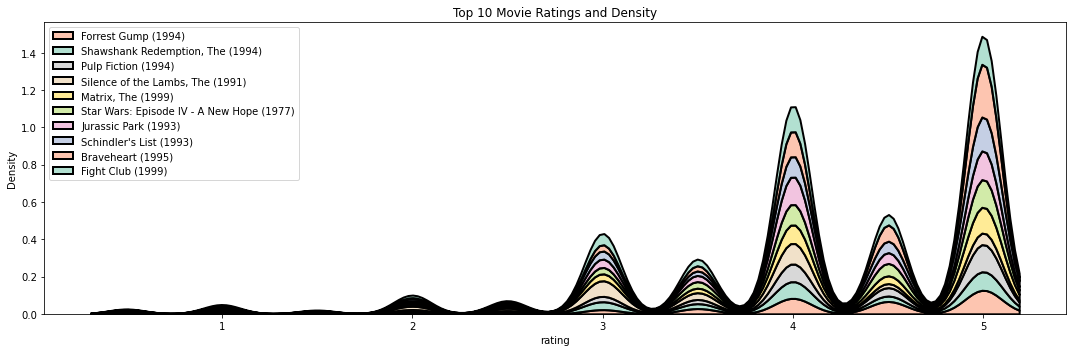

In [9]:
plt.figure(figsize=(15,5))
plt.title("Top 10 Movie Ratings and Density")
sns.kdeplot(data=top10mov_rate, x='rating', hue='title', alpha=.5, linewidth=2, multiple="stack", palette="Set2")
plt.legend(loc='upper left',labels= top10mov_rate.title.unique())
plt.tight_layout()

# Top 10 movies with highest ratings

In [10]:
movies_rating_df1 = movies_rating_df.groupby(['title'])[['rating']].mean().sort_values(by = 'rating',ascending=False)

In [11]:
ratings_df=pd.read_csv('ratings.csv')

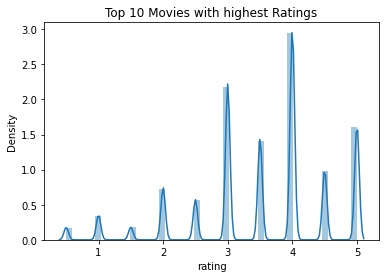

In [12]:
plt.figure()
plt.title("Top 10 Movies with highest Ratings")
sns.distplot(ratings_df.rating)
plt.show()

# Rating for Top 10 Movies & Most Famous Genre in Movies

In [13]:
# usecols allows us to select our choice of features
movies_df=pd.read_csv('movies.csv', usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})

In [14]:
movies_df1=pd.read_csv('movies.csv')
movies_df1[['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7',
            'genre8', 'genre9', 'genre10']] = movies_df1['genres'].str.split(pat='|', expand=True).fillna(0)

In [15]:
topmovie_genre=top10mov.merge(movies_df1[['movieId','genre1']],on ='movieId', how='inner')
top10gen_rate = topmovie_genre.merge(ratings_df, on = 'movieId', how='inner')
top10gen_rate.head()

,movieId,title,genre1,userId,rating,timestamp
0,356,Forrest Gump (1994),Comedy,2,4.5,1141416637
1,356,Forrest Gump (1994),Comedy,3,4.0,1439472199
2,356,Forrest Gump (1994),Comedy,5,4.0,833146744
3,356,Forrest Gump (1994),Comedy,8,5.0,890489591
4,356,Forrest Gump (1994),Comedy,9,5.0,859383448


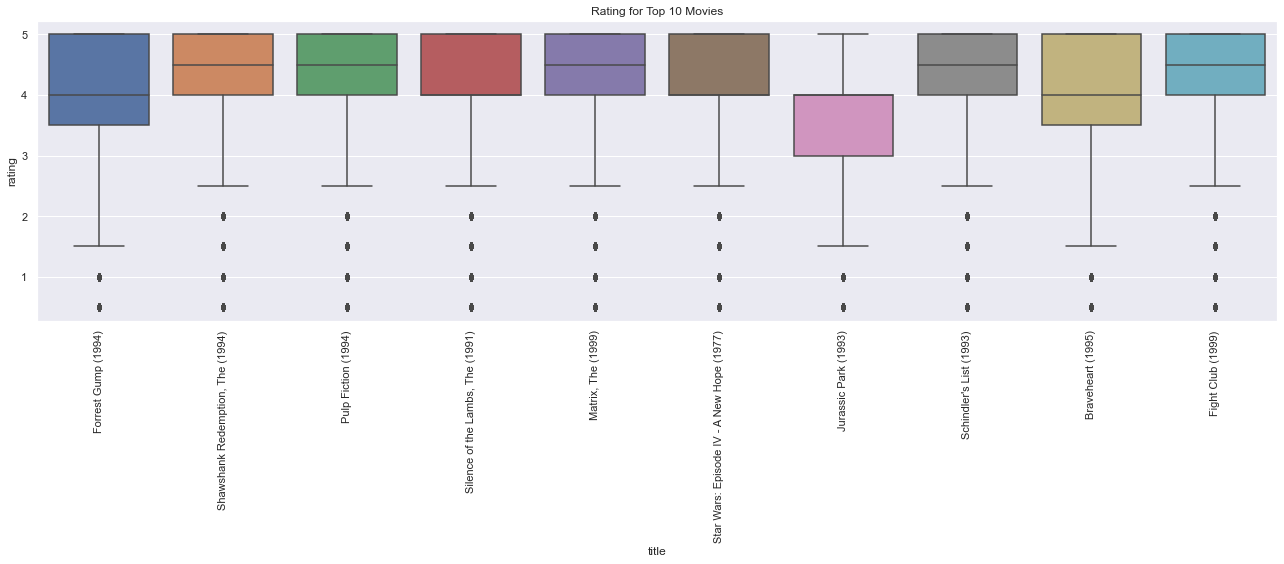

In [16]:
# Display the generated image:
sns.set(rc={'figure.figsize':(18, 8)})
sns.boxplot(x='title', y='rating', data=top10gen_rate)
plt.xticks(rotation = 90)
plt.title('Rating for Top 10 Movies')
plt.tight_layout()

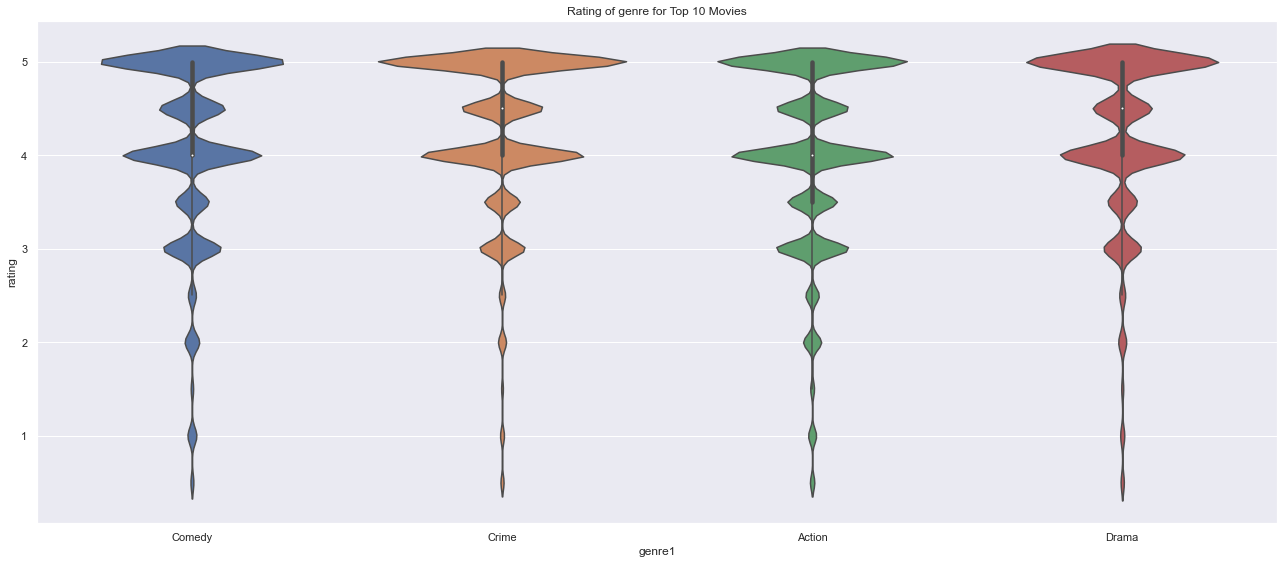

In [17]:
# Display the generated image:
sns.set(rc={'figure.figsize':(18, 8)})
sns.violinplot(x='genre1', y='rating', data=top10gen_rate)
plt.title('Rating of genre for Top 10 Movies')
plt.tight_layout()

# Major genre of the movie

In [18]:
#major genre of the movie
genre1 = movies_df1.genre1.value_counts()
genre1 = pd.DataFrame(genre1)
genre1 = genre1.reset_index()
genre1.rename({'index': 'genre', 'genre1':'Count'}, axis=1, inplace=True)
genre1.columns

Index(['genre', 'Count'], dtype='object')

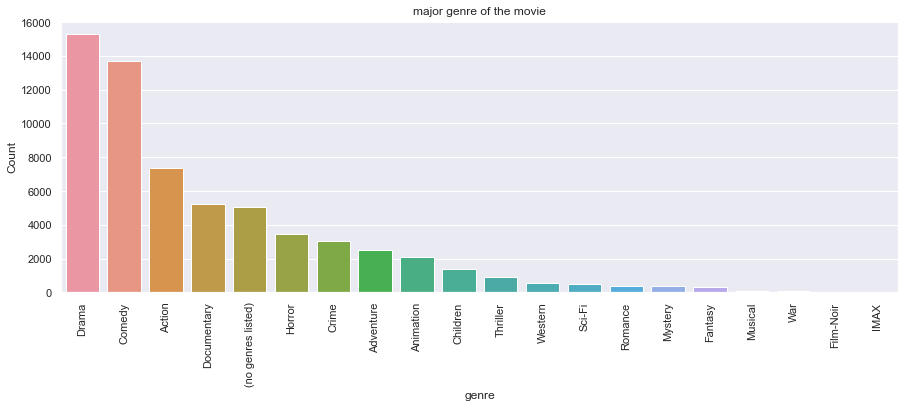

In [19]:
# Display the generated image:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel("genre1")
plt.ylabel("Count of movies")
plt.title("major genre of the movie")
sns.barplot(genre1.genre,genre1.Count)
plt.show()

# Treding Tags

Generating WordClouds for tags in Python
Create and generate a word cloud image:

In [20]:
tags_df=pd.read_csv('tags.csv')
tags_df.head()
text = tags_df["tag"].str.cat(sep=', ')
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",max_words=100).generate(text)

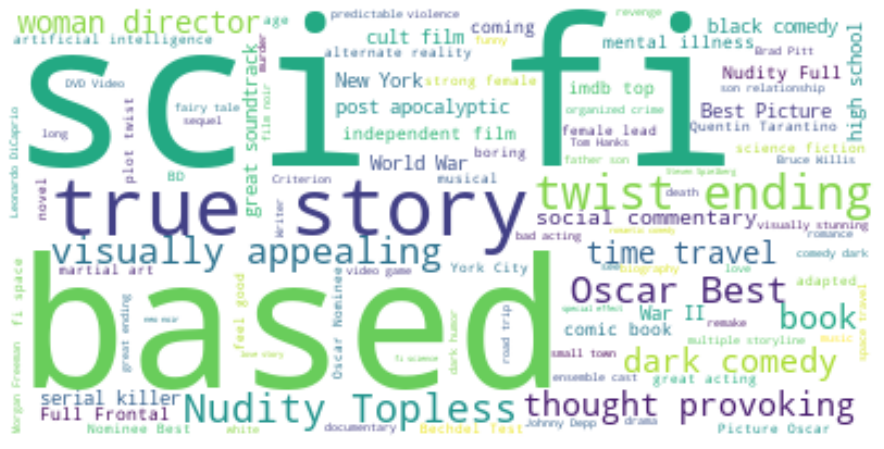

In [21]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Cleaning and PreProcessing

In [22]:
tags_df=pd.read_csv('tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [23]:
#checking for NaN values
movies_df.isnull().sum()

movieId    0
title      0
dtype: int64

In [24]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [25]:
tags_df.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [26]:
tags_df = tags_df.dropna(subset = ["tag"])
tags_df.shape

(1093344, 4)

In [27]:
print("Movies:",movies_df.shape)
print("Ratings:",ratings_df.shape)

Movies: (62423, 2)
Ratings: (25000095, 4)


# Merge/Group Datasets 

In [28]:
movies_merged_df=movies_df.merge(ratings_df, on='movieId')
movies_merged_df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),2,3.5,1141415820
1,1,Toy Story (1995),3,4.0,1439472215
2,1,Toy Story (1995),4,3.0,1573944252
3,1,Toy Story (1995),5,4.0,858625949
4,1,Toy Story (1995),8,4.0,890492517


In [29]:
movies_average_rating=movies_merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,title,Average Rating
0,From Here To Eternity: The Musical (2014),5.0
1,Tainted Blood (1993),5.0
2,Look at Me (2012),5.0
3,My Christmas Prince (2017),5.0
4,You Must Be Joking (2014),5.0


In [30]:
movies_rating_count=movies_merged_df.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.head()

,title,Rating Count,Average Rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1,3.0
1,On Trial (1954),1,3.5
2,Checkmate,1,3.0
3,On Top (1982),1,3.5
4,On Reflection: B.S. Johnson on Dr. Samuel John...,1,4.5


In [31]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')
%matplotlib inline

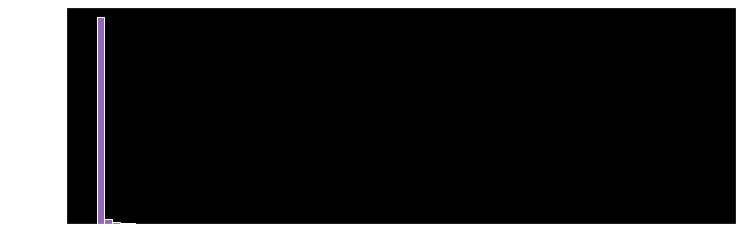

In [32]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80,color='tab:purple')
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.show()

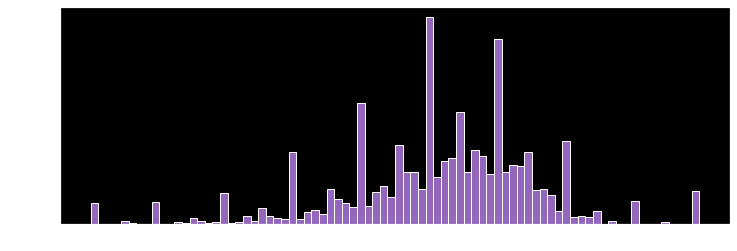

In [33]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80,color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
plt.show()

In [34]:
rating_with_RatingCount = movies_merged_df.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),2,3.5,1141415820,57309
1,1,Toy Story (1995),3,4.0,1439472215,57309
2,1,Toy Story (1995),4,3.0,1573944252,57309
3,1,Toy Story (1995),5,4.0,858625949,57309
4,1,Toy Story (1995),8,4.0,890492517,57309


In [35]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(rating_with_RatingCount['Rating Count'].describe())

count   25000095.000
mean       14925.355
std        16439.336
min            1.000
25%         2986.000
50%         9152.000
75%        20757.000
max        81491.000
Name: Rating Count, dtype: float64


In [36]:
popularity_threshold = 50
popular_movies= rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),2,3.500,1141415820,57309
1,1,Toy Story (1995),3,4.000,1439472215,57309
2,1,Toy Story (1995),4,3.000,1573944252,57309
3,1,Toy Story (1995),5,4.000,858625949,57309
4,1,Toy Story (1995),8,4.000,890492517,57309


# Movie Rating Predictor - Logistic Regression and RandomForestClassifier

In [37]:
#we will start with merged dataset(movies and rating)
movies_merged_df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),2,3.500,1141415820
1,1,Toy Story (1995),3,4.000,1439472215
2,1,Toy Story (1995),4,3.000,1573944252
3,1,Toy Story (1995),5,4.000,858625949
4,1,Toy Story (1995),8,4.000,890492517


In [38]:
moviesrefined_dataset = movies_merged_df.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean"})

moviesrefined_dataset.head()

,userId,title,rating
0,1,2046 (2004),4.500
1,1,5x2 (2004),3.500
2,1,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",4.500
3,1,Back to the Future Part II (1989),2.500
4,1,Back to the Future Part III (1990),2.500


In [39]:
#Some more data preparation and preprocessing 
from sklearn.preprocessing import LabelEncoder
user_enc = LabelEncoder()
moviesrefined_dataset['user'] = user_enc.fit_transform(moviesrefined_dataset['userId'].values)
n_users = moviesrefined_dataset['user'].nunique()

item_enc = LabelEncoder()
moviesrefined_dataset['movie'] = item_enc.fit_transform(moviesrefined_dataset['title'].values)
n_movies = moviesrefined_dataset['movie'].nunique()

moviesrefined_dataset['rating'] = moviesrefined_dataset['rating'].values.astype(np.float32)
min_rating = min(moviesrefined_dataset['rating'])
max_rating = max(moviesrefined_dataset['rating'])
n_users, n_movies, min_rating, max_rating

(162541, 58958, 0.5, 5.0)

In [40]:
moviesrefined_dataset.head()

,userId,title,rating,user,movie
0,1,2046 (2004),4.500,0,367
1,1,5x2 (2004),3.500,0,654
2,1,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",4.500,0,2889
3,1,Back to the Future Part II (1989),2.500,0,4656
4,1,Back to the Future Part III (1990),2.500,0,4657


# Training and Test Data

First,pull the columns to analyze exclude the Ratings column since this is our dependent variable.
Then lets make a smaller dataset with only those relevant features to use regression alogorithms
Also do some data preprocessing to get it ready for Logistic Regression

In [43]:
X = moviesrefined_dataset[['user', 'movie']].values
y = moviesrefined_dataset['rating'].values
X = X[0:10000]
y = y[0:10000]
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

Split the data into training and testing data. 

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9000, 2), (1000, 2), (9000,), (1000,))

Print training dataset

In [45]:
y_train

array([1, 7, 5, ..., 6, 6, 8])

Logistic regression is best used for predicting categorical data

We need to do logistic regression on the training data so we can see how well our test data does the prediction.
Also print predictions dataset

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

Calculate accuracy of Logistic regression

In [47]:
lab = preprocessing.LabelEncoder()
y_test= lab.fit_transform(y_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.273

In [48]:
print ('actual:    ', y_test[0:30])
print ('predicted: ', y_pred[0:30])

actual:     [3 7 9 7 0 2 7 5 7 7 6 9 9 5 9 3 7 6 5 8 9 6 5 5 6 6 8 7 7 9]
predicted:  [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


HyperParameter Tuning for Logistic Regression model used above and get the best accuracy

In [49]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 200,500, 1000]
    }
]

In [50]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2200 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2930 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  9.7min finished


In [51]:
best_clf.best_estimator_

LogisticRegression(C=11.288378916846883, max_iter=500, penalty='l1',
                   solver='liblinear')

In [52]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.288


# RandomForestClassifier

The random forest classifier can be used to solve for regression or classification problems. The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample.
We have tried random forest for predictiong movie data with hyperparameter tuning by trying different number of estimators and calculating accuracies 

In [53]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(class_weight='balanced')
RFC.set_params(n_estimators=10)
RFC.fit(X_train,y_train)
R2_rfc = RFC.score(X_test,y_test) 
print(np.round(R2_rfc,2))

0.26


In [54]:
from sklearn.ensemble import RandomForestClassifier
RFC1 = RandomForestClassifier(class_weight='balanced')
RFC1.set_params(n_estimators=1000)
RFC1.fit(X_train,y_train)
R2_rfc1 = RFC1.score(X_test,y_test) 
print(np.round(R2_rfc1,2))

0.27


In [55]:
from sklearn.ensemble import RandomForestClassifier
RFC2 = RandomForestClassifier(class_weight='balanced')
RFC2.set_params(n_estimators=2000)
RFC2.fit(X_train,y_train)
R2_rfc2 = RFC2.score(X_test,y_test) 
print(np.round(R2_rfc2,2))

0.27


# Matrix Factorization

Truncated Singular Value Decomposition (SVD) is a matrix factorization technique that factors a matrix M into the three matrices U, Σ, and V. This is very similar to PCA, excepting that the factorization for SVD is done on the data matrix,
We start by dropping null values of title column and then build a datatset movie_ratingCount to get movies with their ratingcount. Merging it again to get user_rating_count dataset to build a pivot table to perform matrix factorization algo. Then further fitting it using TruncatedSVD algo and making a correlation matrix , then getting list of recommended movies.

In [56]:
movie_rating = movies_merged_df.dropna(axis = 0, subset = ['title'])

movie_ratingCount = (movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head(10)

,title,totalRatingCount
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1
1,"""Great Performances"" Cats (1998)",179
2,#1 Cheerleader Camp (2010),9
3,#Captured (2017),2
4,#Female Pleasure (2018),3
5,#FollowMe (2019),6
6,#Horror (2015),23
7,#Lucky Number (2015),1
8,#SCREAMERS (2016),3
9,#SquadGoals (2018),1


In [57]:
rating_with_totalRatingCount = movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head(10)

,movieId,title,userId,rating,timestamp,totalRatingCount
0,1,Toy Story (1995),2,3.500,1141415820,57309
1,1,Toy Story (1995),3,4.000,1439472215,57309
2,1,Toy Story (1995),4,3.000,1573944252,57309
3,1,Toy Story (1995),5,4.000,858625949,57309
4,1,Toy Story (1995),8,4.000,890492517,57309
5,1,Toy Story (1995),10,3.500,1227571347,57309
6,1,Toy Story (1995),12,4.000,1167582601,57309
7,1,Toy Story (1995),13,4.000,1265223970,57309
8,1,Toy Story (1995),18,3.000,1108273483,57309
9,1,Toy Story (1995),26,3.000,1280515839,57309


In [59]:
user_rating = rating_with_totalRatingCount.drop_duplicates(['userId','title'])
user_rating.head(10)

,movieId,title,userId,rating,timestamp,totalRatingCount
0,1,Toy Story (1995),2,3.500,1141415820,57309
1,1,Toy Story (1995),3,4.000,1439472215,57309
2,1,Toy Story (1995),4,3.000,1573944252,57309
3,1,Toy Story (1995),5,4.000,858625949,57309
4,1,Toy Story (1995),8,4.000,890492517,57309
5,1,Toy Story (1995),10,3.500,1227571347,57309
6,1,Toy Story (1995),12,4.000,1167582601,57309
7,1,Toy Story (1995),13,4.000,1265223970,57309
8,1,Toy Story (1995),18,3.000,1108273483,57309
9,1,Toy Story (1995),26,3.000,1280515839,57309


In [60]:
#slice dataset as it is too big to do pivot
user_rating = user_rating[0:1000000]

In [61]:
#Fill matrix with 0 values
movie_user_rating_pivot = user_rating.pivot(index = 'userId', columns = 'title', values = 'rating').fillna(0)
movie_user_rating_pivot.head(10)

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),Bad Boys (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,...,2.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,3.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
12,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.500,...,0.000,3.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


# Movie recommendation using Truncated SVD

In [63]:
#use Truncated SVD
from scipy.sparse import csr_matrix
X = movie_user_rating_pivot.values.T
X.shape
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(144, 12)

In [64]:
corr = np.corrcoef(matrix)
corr.shape

(144, 144)

In [65]:
movie_title = movie_user_rating_pivot.columns
movie_title_list = list(movie_title)
coffey_movies = movie_title_list.index(movie_title_list[12])

In [66]:
corr_coffey_movies  = corr[coffey_movies]
list(movie_title[(corr_coffey_movies >= 0.9)])

['Bed of Roses (1996)',
 'Before and After (1996)',
 'Birdcage, The (1996)',
 'Catwalk (1996)',
 'Eye for an Eye (1996)',
 'Father of the Bride Part II (1995)',
 'Grumpier Old Men (1995)',
 'If Lucy Fell (1996)',
 'Juror, The (1996)',
 'Mary Reilly (1996)',
 "Mr. Holland's Opus (1995)",
 'Mr. Wrong (1996)',
 'Pie in the Sky (1996)',
 'Sabrina (1995)',
 'Two Bits (1995)',
 'Two if by Sea (1996)',
 'Unforgettable (1996)',
 'Up Close and Personal (1996)',
 'White Squall (1996)']

# SVD

We are using surprise library to implement SVD algorithm on movielens dataset. We have used smaller dataset (ml-1m ) here to fit algorithm. It uses train_test_split to split data to start with it. Then, it make predictions using SVD algorithm and calculate RMSE . We keep on changing n_factors as a part of hyperparametertuning to get best RMSE score. And then plot a graph for RMSE and n_factors. 

In [67]:
from surprise import SVD         
from surprise import Dataset     
from surprise.model_selection import train_test_split 
from surprise import accuracy

In [68]:
rmses = []
algo = SVD()
data = Dataset.load_builtin('ml-1m', False)
trainset, testset = train_test_split(data, test_size=.15)

In [69]:
algo.fit(trainset)
predictions = algo.test(testset)

In [70]:
accuracy.rmse(predictions)

RMSE: 0.8712


0.8711825847946654

In [71]:
rmses.append(accuracy.rmse(predictions))

RMSE: 0.8712


In [72]:
algo2 = SVD(n_factors = 20,n_epochs = 25)
algo2.fit(trainset)
predictions2 = algo2.test(testset)
accuracy.rmse(predictions2)
rmses.append(accuracy.rmse(predictions))

RMSE: 0.8648
RMSE: 0.8712


In [73]:
algo2 = SVD(n_factors = 120,n_epochs = 25)
algo2.fit(trainset)
predictions2 = algo2.test(testset)
accuracy.rmse(predictions2)

RMSE: 0.8777


0.8777008429697608

In [74]:
rmses.append(accuracy.rmse(predictions2))

RMSE: 0.8777


In [75]:
algo2 = SVD(n_factors = 240,n_epochs = 25)
algo2.fit(trainset)
predictions2 = algo2.test(testset)
accuracy.rmse(predictions2)

RMSE: 0.8813


0.8813348144739614

In [76]:
rmses.append(accuracy.rmse(predictions))

RMSE: 0.8712


In [77]:
algo2 = SVD(n_factors = 280,n_epochs = 25)
algo2.fit(trainset)
predictions2 = algo2.test(testset)
accuracy.rmse(predictions2)
rmses.append(accuracy.rmse(predictions))

RMSE: 0.8831
RMSE: 0.8712


Visulaization for RMSE score

In [78]:
def printRMSEGraph(n_factors, RMSEArr):
    plt.plot(n_factors, RMSEArr)
    plt.xlabel("Num of Factors")
    plt.ylabel("RMSE")

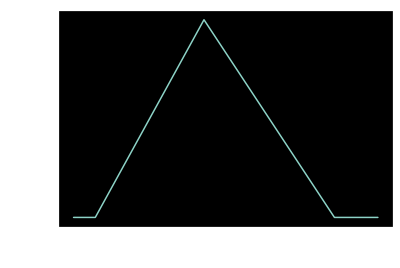

In [79]:
n_factors = [0, 20, 120, 240,280]
printRMSEGraph(n_factors, rmses)

# Item-based Collaborative Filtering

Item collaborative filtering is a type of recommendation system that is based on the similarity between items calculated using the rating users have given to items. It helps solve issues that user-based collaborative filters suffer from such as when the system has many items with fewer items rated. Function => get_other_movies accepts a movie name as a parameter. It creates a dataframe for that movie and group it by title.Then it merges that dataframe with ratings dataset on userId column. Then we further group it by title and get user count.We also calculate percentage of who watched.

In [80]:
ratedmovies = pd.merge(ratings_df, movies_df, on = 'movieId')
ratedmovies.head()

,userId,movieId,rating,timestamp,title
0,1,296,5.000,1147880044,Pulp Fiction (1994)
1,3,296,5.000,1439474476,Pulp Fiction (1994)
2,4,296,4.000,1573938898,Pulp Fiction (1994)
3,5,296,4.000,830786155,Pulp Fiction (1994)
4,7,296,4.000,835444730,Pulp Fiction (1994)


In [81]:
#Gets the other top 10 movies which are watched by the people who saw this particular movie
def get_other_movies(movie_name):
    df_movie_users_series = ratedmovies.loc[ratedmovies['title']==movie_name]['userId']
    df_movie_users = pd.DataFrame(df_movie_users_series,columns=['userId'])
    other_movies = pd.merge(df_movie_users,ratedmovies,on='userId')
    other_users_watched = pd.DataFrame(other_movies.groupby('title')['userId'].count()).sort_values('userId',ascending=False)
    other_users_watched['perc_who_watched'] = round(other_users_watched['userId']*100/other_users_watched['userId'][0],1)
    return other_users_watched[:10]

In [82]:
get_other_movies('Fight Club (1999)')

,userId,perc_who_watched
title,,
Fight Club (1999),58773,100.000
"Matrix, The (1999)",45611,77.600
Pulp Fiction (1994),41675,70.900
"Shawshank Redemption, The (1994)",40986,69.700
Forrest Gump (1994),37963,64.600
"Lord of the Rings: The Fellowship of the Ring, The (2001)",36633,62.300
"Silence of the Lambs, The (1991)",36162,61.500
American Beauty (1999),35806,60.900
Star Wars: Episode IV - A New Hope (1977),33889,57.700


# KNN

#### Movie recommendation system using a k-nearest neighbors (k-NN) algorithm. It begins by loading the movie and ratings data from two CSV files, movies.csv and ratings.csv, using the pandas library. The null values in the data are then checked.

#### Next, the two dataframes are merged on the movieId column to create a combined dataframe of movie information and user ratings. The average rating for each movie is calculated and sorted in descending order. This dataframe is then used in later stages of the recommendation system.Next, the average rating for each movie is calculated, and the number of ratings for each movie is counted. These two dataframes are then merged on the title column. The dataframe is then filtered to include only those movies with a minimum number of ratings, as determined by the popularity_threshold variable.

#### The filtered dataframe is then transformed into a matrix of movie ratings by user, with movies as the rows and users as the columns. This matrix is then converted into a sparse matrix for more efficient computation. The k-NN model is then trained on this matrix using the cosine distance metric and the brute algorithm.

#### Finally, the user is prompted to input a movie title. The model finds the k=6 nearest neighbors of this movie, and recommends these movies to the user.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
import re, string

In [2]:
# usecols allows us to select our choice of features
movies_df=pd.read_csv('movies.csv', usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [3]:
ratings_df=pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating','timestamp'],dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [8]:
#checkinng for NaN values
movies_df.isnull().sum()

movieId    0
title      0
dtype: int64

In [9]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
print("Movies:",movies_df.shape)
print("Ratings:",ratings_df.shape)

Movies: (62423, 2)
Ratings: (25000095, 4)


#### Creating a dataframe, movies_merged_df, that is the result of merging the movies_df and ratings_df dataframes on the movieId column.

In [11]:
movies_merged_df=movies_df.merge(ratings_df, on='movieId')
movies_merged_df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),2,3.5,1141415820
1,1,Toy Story (1995),3,4.0,1439472215
2,1,Toy Story (1995),4,3.0,1573944252
3,1,Toy Story (1995),5,4.0,858625949
4,1,Toy Story (1995),8,4.0,890492517


#### Next, the average rating for each movie is calculated, sorted in descending order, and added to a new dataframe, movies_average_rating. The number of ratings for each movie is also counted and added to a dataframe called movies_rating_count, sorted in ascending order. The movies_rating_count and movies_average_rating dataframes are then merged on the title column to create a dataframe called movies_rating_count_avg.

In [12]:
movies_average_rating=movies_merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,title,Average Rating
0,Full of Grace (2015),5.0
1,Geordie (1955),5.0
2,Garfield In Paradise (1986),5.0
3,Lost Woods (2012),5.0
4,Garfield in the Rough (1984),5.0


In [13]:
movies_rating_count=movies_merged_df.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.head()

,title,Rating Count,Average Rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1,3.0
1,On Trial (1954),1,3.5
2,Checkmate,1,3.0
3,On Top (1982),1,3.5
4,On Reflection: B.S. Johnson on Dr. Samuel John...,1,4.5


In [14]:
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')
%matplotlib inline

#### The code creates a histogram that shows the distribution of ratings counts for movies. It uses a DataFrame called movies_rating_count_avg that contains the ratings counts for each movie, and it plots these counts in bins of 80. It also sets the y-axis label to "Ratings Count(Scaled)" and sets the font size to 16. Finally, it displays the histogram using the show() method.

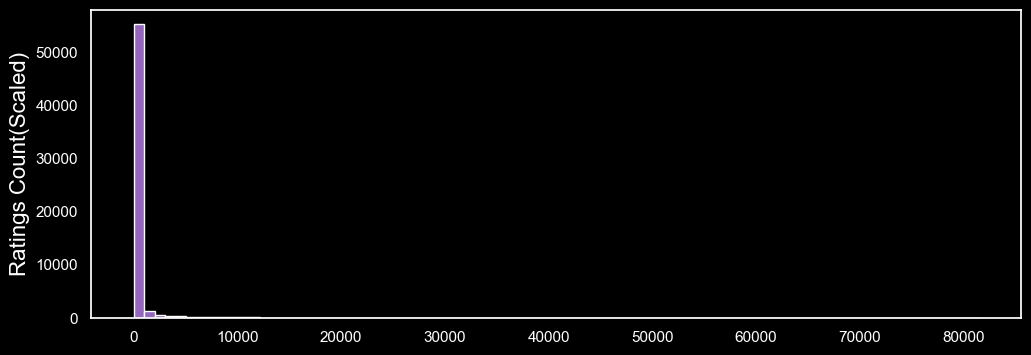

In [15]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80,color='tab:purple')
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.show()

#### This code creates a histogram plot using the Average Rating column of the movies_rating_count_avg DataFrame. The histogram is displayed using the show() method of the matplotlib library's pyplot module. The number of bins used is 80, and the color of the histogram bars is set to 'tab:purple'. The y-axis is labeled as 'Average Rating' with a font size of 16. The figure size is set to 12 inches in width and 4 inches in height.

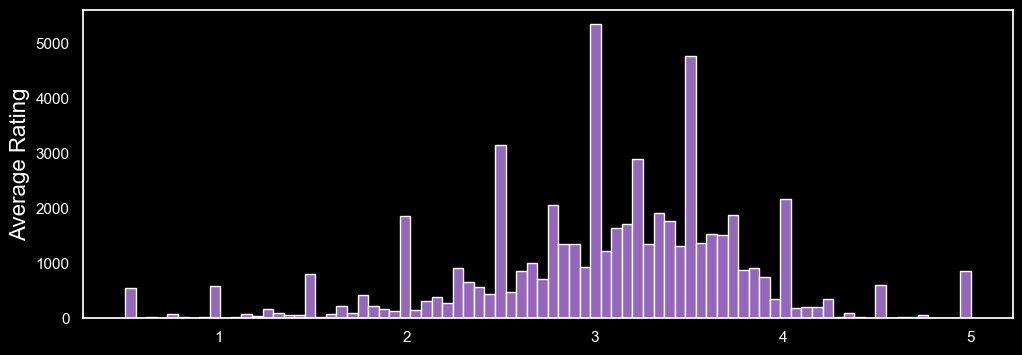

In [16]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80,color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
plt.show()

#### The code above creates a scatter plot with two axes, 'Average Rating' and 'Rating Count'. It uses the movies_rating_count_avg dataframe as the source of data, and sets the transparency level to 0.5 and the color to 'tab:pink'. The jointplot function is a part of the seaborn library and is used to create a scatter plot with histograms on both axes.

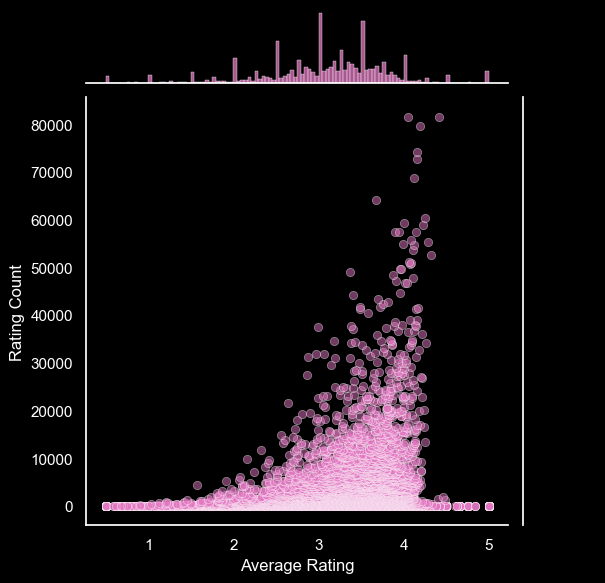

In [17]:
sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5, color='tab:pink')
plt.show()

#### The movies_merged_df and movies_rating_count dataframes are then merged on the title column to create a new dataframe called rating_with_RatingCount. This dataframe will be used later in the recommendation system.

In [18]:
rating_with_RatingCount = movies_merged_df.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),2,3.5,1141415820,57309
1,1,Toy Story (1995),3,4.0,1439472215,57309
2,1,Toy Story (1995),4,3.0,1573944252,57309
3,1,Toy Story (1995),5,4.0,858625949,57309
4,1,Toy Story (1995),8,4.0,890492517,57309


In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(rating_with_RatingCount['Rating Count'].describe())

count   25000095.000
mean       14925.355
std        16439.336
min            1.000
25%         2986.000
50%         9152.000
75%        20757.000
max        81491.000
Name: Rating Count, dtype: float64


#### Defining a popularity threshold of 50 ratings, and filters the rating_with_RatingCount dataframe to include only those movies with a minimum number of ratings. These popular movies are stored in a dataframe called popular_movies.

In [20]:
popularity_threshold = 50
popular_movies= rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),2,3.500,1141415820,57309
1,1,Toy Story (1995),3,4.000,1439472215,57309
2,1,Toy Story (1995),4,3.000,1573944252,57309
3,1,Toy Story (1995),5,4.000,858625949,57309
4,1,Toy Story (1995),8,4.000,890492517,57309


#### Next, a pivot table is created from the popular_movies dataframe, with movies as the rows, users as the columns, and ratings as the values. This pivot table is stored in a dataframe called movie_features_df, and any missing values are filled with 0s.

In [21]:
movie_features_df=popular_movies.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,162532,162533,162534,162535,162536,162537,162538,162539,162540,162541
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
$9.99 (2008),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'71 (2014),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Hellboy': The Seeds of Creation (2004),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Round Midnight (1986),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


#### The movie_features_df dataframe is then converted into a sparse matrix, movie_features_df_matrix, for more efficient computation. 

In [22]:
movie_features_df_matrix = csr_matrix(movie_features_df.values)

#### A k-NN model is then trained on this matrix using the cosine distance metric and the brute algorithm. This model will be used later to make movie recommendations.

In [23]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [24]:
movie_features_df.shape

(13176, 162540)

#### The k-NN model is used to find the k=6 nearest neighbors of a specified movie in the movie_features_df dataframe. This movie is specified by its index in the dataframe, test_index. The distances to these nearest neighbors are calculated and stored in the distances variable, and the indices of these nearest neighbors are stored in the indices variable. These distances and indices will be used later to print the recommended movies to the user.

In [40]:

query_index = np.random.choice(movie_features_df.shape[0])
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [26]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,162532,162533,162534,162535,162536,162537,162538,162539,162540,162541
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
$9.99 (2008),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'71 (2014),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Hellboy': The Seeds of Creation (2004),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Round Midnight (1986),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [39]:
titles_list = list(movie_features_df.index)

#### Next, a movie is taken as input. For the purpose of submission so that all cells run, 'Toy Story' has been hardcoded as the value. The index of the title is used by KNN. The commented code can be used to take input from user, limited to the movies in the movies_df dataframe. The code creates a new list called final_titles_list by removing the last 7 characters from each movie title in the titles_list list. The movie title is then used to find the index of that movie in the final_titles_list list.

In [28]:

final_titles_list = []
for x in titles_list:
    size = len(x)
    y = x[:size - 7]
    final_titles_list.append(y)

In [38]:
val = "Toy Story" #input("Enter your movie name: ")

In [35]:
test_index = final_titles_list.index(val)
test_index

11977

In [36]:
distances, indices = model_knn.kneighbors(movie_features_df.iloc[test_index,:].values.reshape(1, -1), n_neighbors = 6)

#### Recommendations made:

In [37]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[test_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Toy Story (1995):

1: Star Wars: Episode IV - A New Hope (1977), with distance of 0.4327220916748047:
2: Toy Story 2 (1999), with distance of 0.4364507794380188:
3: Back to the Future (1985), with distance of 0.45184415578842163:
4: Forrest Gump (1994), with distance of 0.4562179446220398:
5: Jurassic Park (1993), with distance of 0.46025002002716064:


# ____________________________________________________

# User Based Collaborative Filtering

#### This is a user-based collaborative filtering recommendation system. It takes a random user's ID as an input, along with a dataframe containing movie ratings by users, a ratio (which represents the percentage of movies that must have been rated by other users to be considered for recommendation), a correlation threshold for selecting similar users, and a minimum rating score for a movie to be recommended.

#### The function first extracts the movies that the random user has rated. It then selects those users who have rated a sufficient number of those movies (as determined by the ratio parameter). The Pearson correlation coefficient is calculated between the random user and these similar users, and those users with a sufficiently high correlation are selected. The function then calculates a weighted average of the ratings of these similar users for each movie, and recommends movies with a rating greater than the specified minimum score.

In [1]:
import numpy as np 
import pandas as pd 

#### Defining a function called create_user_movie_df that creates a user-movie ratings dataframe from two input files, movies.csv and ratings.csv.

#### The function begins by reading in the movies.csv and ratings.csv files as dataframes called movie and rating, respectively. These two dataframes are then merged on the movieId column, resulting in a dataframe called df.

#### Next, a new dataframe called comment_counts is created, which counts the number of ratings for each movie in the df dataframe. The function then identifies movies that have been rated fewer than or equal to 2000 times, and stores these "rare" movies in a variable called rare_movies. The common_movies variable is then defined as the subset of the df dataframe that includes only those movies that are not in the rare_movies list.

#### Finally, the function creates a pivot table of the common_movies dataframe, with users as the rows and movies as the columns. This pivot table is stored in a dataframe called user_movie_df, which is returned by the function. This dataframe will be used later to make movie recommendations.

In [2]:
def create_user_movie_df():
    movie = pd.read_csv('movies.csv')
    rating = pd.read_csv('ratings.csv')
    df = movie.merge(rating, how="left", on="movieId")
    comment_counts = pd.DataFrame(df["title"].value_counts())
    rare_movies = comment_counts[comment_counts["title"] <= 2000].index
    common_movies = df[~df["title"].isin(rare_movies)]
    user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
    return user_movie_df

In [3]:
user_movie_df = create_user_movie_df()

#### Defining a function called user_based_recommender that takes in a random_user, a user_movie_df, a ratio, a cor_th, and a score. The function first finds the movies that random_user has watched and then finds other users who have watched a similar number of movies as random_user has watched, defined by the ratio parameter. The function then calculates the correlation between the random_user and the other users who have watched a similar number of movies and filters out the users who have a low correlation with the random_user (defined by cor_th). The function then finds the movies that the remaining users have rated highly (defined by score) and returns these movies as recommendations for the random_user.

In [4]:
def user_based_recommender(random_user, user_movie_df, ratio=60, cor_th=0.65, score=3.5):
    random_user_df = user_movie_df[user_movie_df.index == random_user]
    movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
    movies_watched_df = user_movie_df[movies_watched]
    user_movie_count = movies_watched_df.T.notnull().sum()
    user_movie_count = user_movie_count.reset_index()
    user_movie_count.columns = ["userId", "movie_count"]
    perc = len(movies_watched) * ratio / 100
    users_same_movies = user_movie_count[user_movie_count["movie_count"] > perc]["userId"]

    final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],
                          random_user_df[movies_watched]])

    corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
    corr_df = pd.DataFrame(corr_df, columns=["corr"])
    corr_df.index.names = ['user_id_1', 'user_id_2']
    corr_df = corr_df.reset_index()

    top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= cor_th)][
        ["user_id_2", "corr"]].reset_index(drop=True)

    top_users = top_users.sort_values(by='corr', ascending=False)
    top_users.rename(columns={"user_id_2": "userId"}, inplace=True)
    rating = pd.read_csv('ratings.csv')
    top_users_ratings = top_users.merge(rating[["userId", "movieId", "rating"]], how='inner')
    top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']

    recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})
    recommendation_df = recommendation_df.reset_index()

    movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > score].sort_values("weighted_rating", ascending=False)
    movie = pd.read_csv('movies.csv')
    return movies_to_be_recommend.merge(movie[["movieId", "title"]])

#### This code is using the sample method of the Pandas Series object to randomly select a single userId from the user_movie_df dataframe. The userId is then converted to an integer and stored in the random_user variable. This variable will be used as the input for the user_based_recommender function, which will generate a list of movie recommendations for this user.

In [5]:
random_user = int(pd.Series(user_movie_df.index).sample(1).values)
random_user

70524

#### The code uses the user_based_recommender() function to generate movie recommendations for the user with ID random_user based on their ratings and the ratings of other users. It uses a correlation threshold of 0.70 and a minimum weighted rating of 4 to filter the recommendations. The function returns a dataframe containing the recommended movie IDs and titles.

In [6]:
x = user_based_recommender(random_user, user_movie_df, cor_th=0.70, score=4)

#### Recommendations made:

In [7]:
x

,movieId,weighted_rating,title
0,316,5.0,Stargate (1994)
1,30707,5.0,Million Dollar Baby (2004)
2,260,4.5,Star Wars: Episode IV - A New Hope (1977)
3,339,4.5,While You Were Sleeping (1995)
4,423,4.5,Blown Away (1994)
5,849,4.5,Escape from L.A. (1996)
6,1193,4.5,One Flew Over the Cuckoo's Nest (1975)
7,2881,4.5,Double Jeopardy (1999)
8,3098,4.5,"Natural, The (1984)"
9,3510,4.5,Frequency (2000)
